# Download data and import libraries

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df_data = pd.read_csv("./data/online_shoppers_intention.csv")
df_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Exploratory Data Analysis

In [3]:
# Get the info (column number and name, non-null count, and dtype) for each column in the training df
df_data.info()
# Get summary statistics for the training df with the describe() method
df_data.describe(percentiles=[0.01, 0.05, 0.1, 0.25,0.5,0.75,0.9,0.95,0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.00000,0.000000,0.000000,0.000000,1.000000,4.000000,7.000000,9.000000,14.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.00000,0.000000,0.000000,0.000000,7.500000,93.256250,224.887500,348.266369,830.587041,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,6.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,195.000000,716.390000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,1.00000,1.000000,3.000000,7.000000,18.000000,38.000000,74.000000,109.000000,221.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,0.00000,0.000000,36.000000,184.137500,598.936905,1464.157213,2877.863333,4300.289077,8701.142697,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.00000,0.000000,0.000000,0.000000,0.003112,0.016813,0.058197,0.200000,0.200000,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.00125,0.004568,0.007449,0.014286,0.025156,0.050000,0.100000,0.200000,0.200000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,18.855502,38.160528,85.498490,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.600000,1.000000,1.000000


## Cleaning:
1. There are no missing values
2. There is a need to delete observations with "_Duration" that is greater than 99th persentile in training data to eliminate observations that are related to the event a user "forgot" to close a page 
3. There is a need to delete observations with "PageValue" that is greater than 99th persentile in training data to eliminate bogus observations

In [4]:
#cleaning the data
ini_length = len(df_data)
print("Initial number of records:", len(df_data))
columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']

df_tmp = df_data.copy()
for column in columns:
  ini_length_1 = len(df_data)
  pst99 = df_data[column].quantile(0.99)
  df_data = df_data[df_data[column] <= pst99]
  print("Deleted observations with extream values in ", column, "\t deleted:", ini_length_1 - len(df_data))

print("Total number of records deleted:", ini_length - len(df_data))

Initial number of records: 12330
Deleted observations with extream values in  Administrative_Duration 	 deleted: 124
Deleted observations with extream values in  Informational_Duration 	 deleted: 123
Deleted observations with extream values in  ProductRelated_Duration 	 deleted: 121
Deleted observations with extream values in  PageValues 	 deleted: 120
Total number of records deleted: 488


In [5]:
#look at categorical columns: Administrative, Informational, ProductRelated
df_data['ProductRelated'].value_counts()

1      621
2      463
3      454
4      403
6      390
      ... 
305      1
241      1
233      1
217      1
195      1
Name: ProductRelated, Length: 230, dtype: int64

## Data definitions and value distributions for non-numeric features

In [6]:
#Look at label distribution
df_data['Revenue'].value_counts()

False    10137
True      1705
Name: Revenue, dtype: int64

In [7]:
#Inspect the unique values of the non-numeric columns, and their counts
print('VisitorType')
print(df_data['VisitorType'].value_counts())
print("\n\nMonth:")
print(df_data['Month'].value_counts())

VisitorType
Returning_Visitor    10134
New_Visitor           1632
Other                   76
Name: VisitorType, dtype: int64


Month:
May     3284
Nov     2806
Mar     1852
Dec     1657
Oct      521
Sep      426
Jul      420
Aug      415
June     278
Feb      183
Name: Month, dtype: int64


## Plots

In [8]:
numeric_columns = [c for c in df_data.columns if df_data[c].dtype not in ["bool", "object"]]

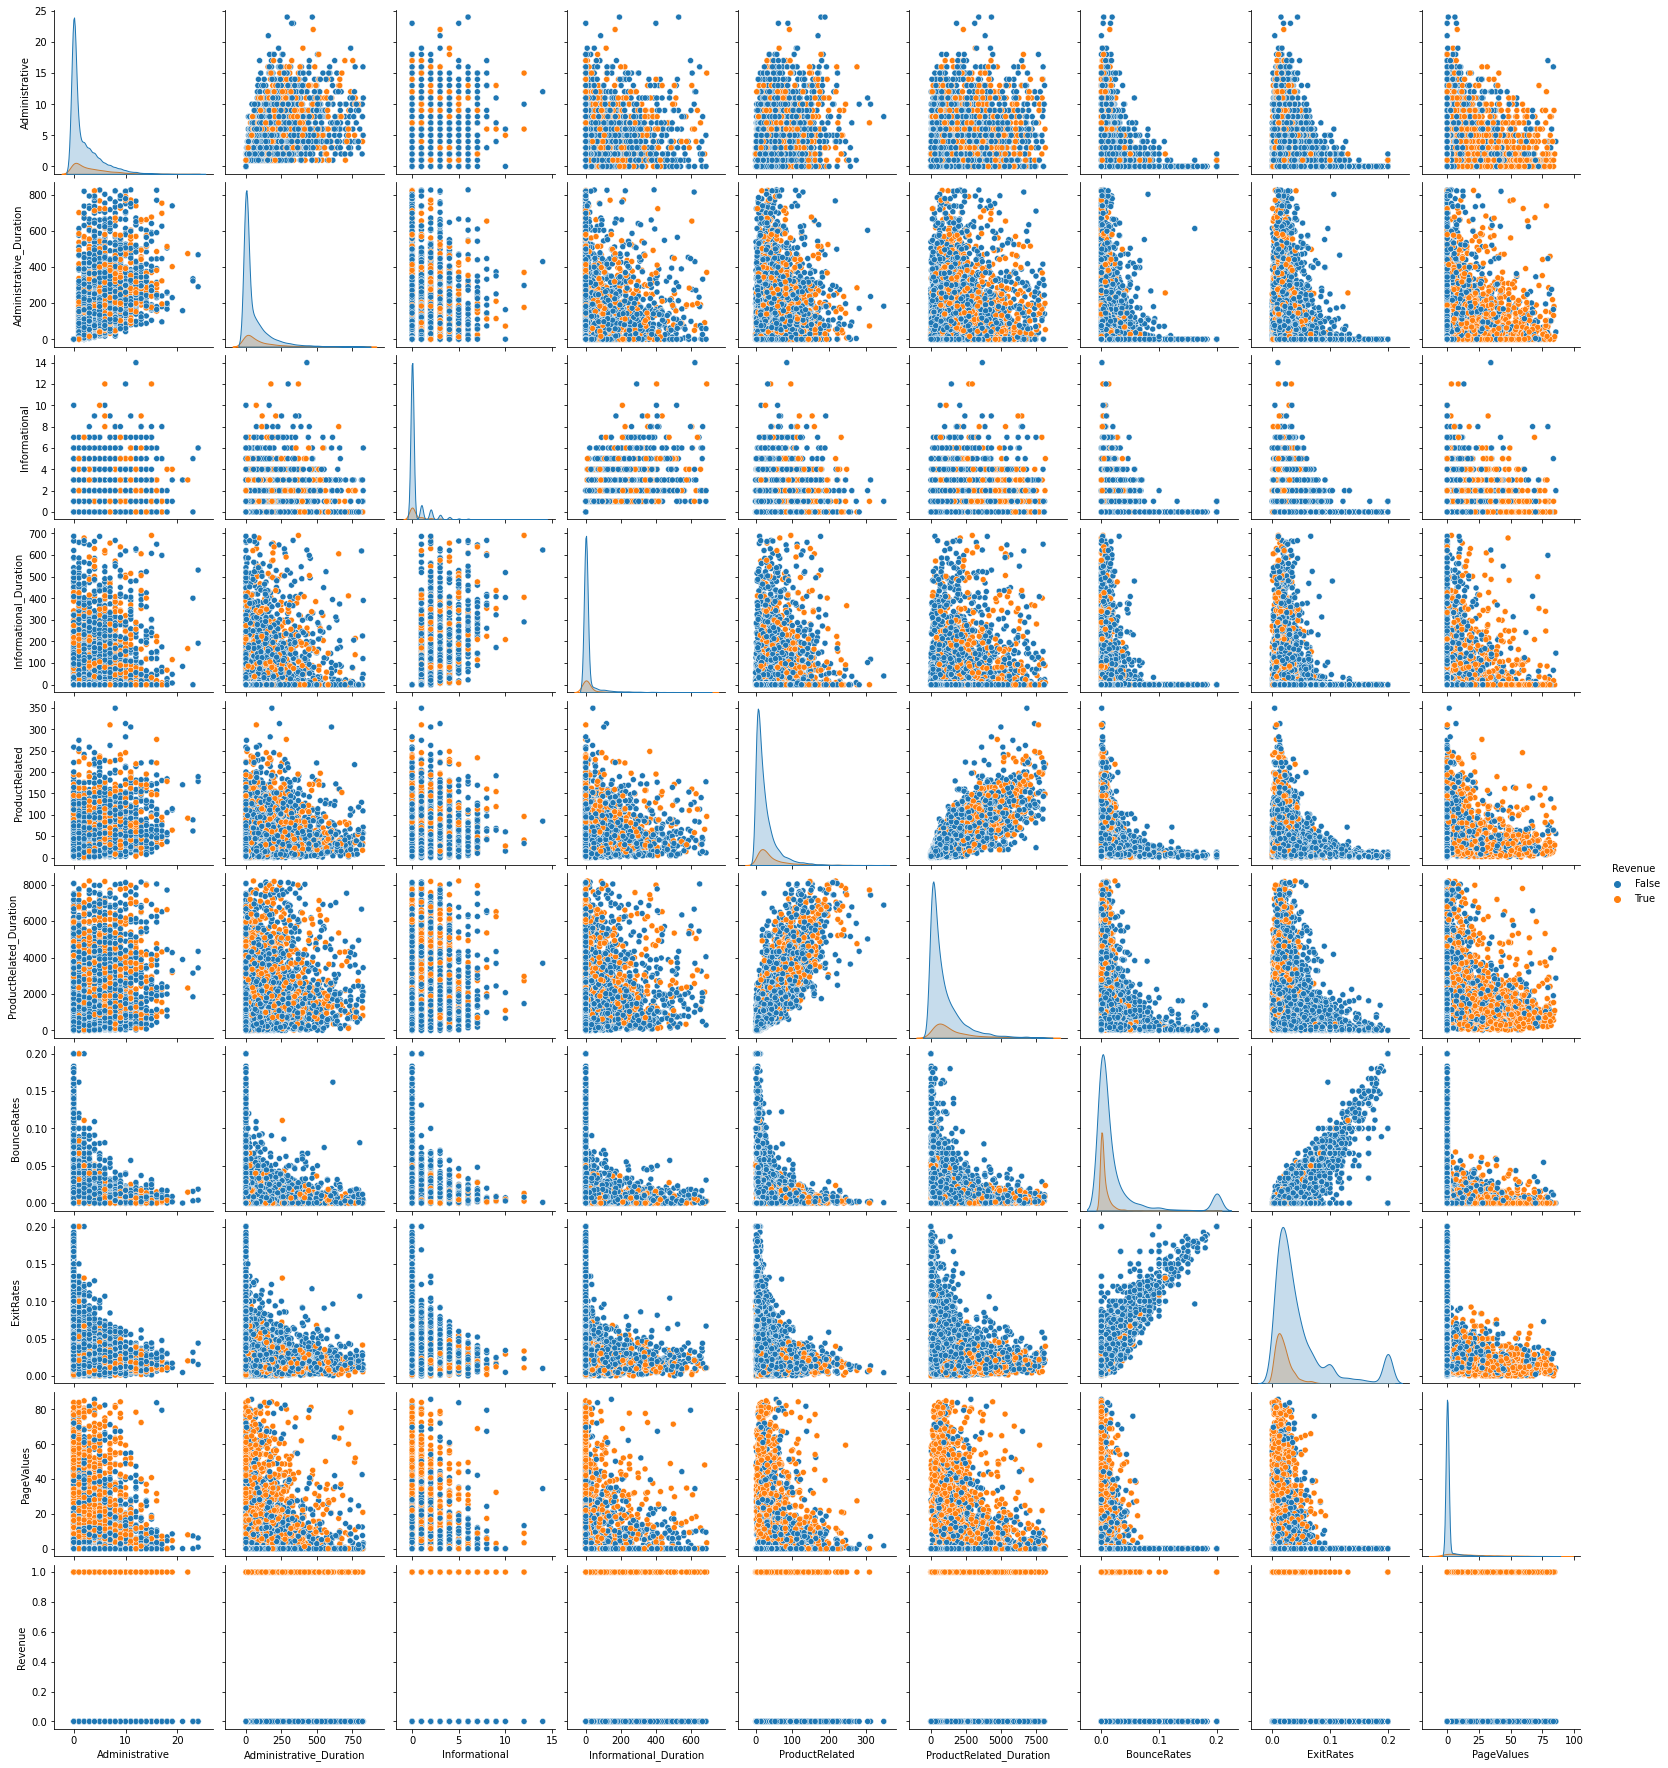

In [9]:
sns.pairplot(df_data[numeric_columns[:9] + ["Revenue"]],              
             x_vars= numeric_columns[:9],
             y_vars= numeric_columns[:9] + ["Revenue"],
             hue="Revenue")

##### Conclusion: 
Plots for "BounceRates"+"ExitRates" and "ProductRelated"+"ProductRelated_Duration" show high correlation and exhibit similar patterns in "Revenue" and when combined with other features.

Hence one in each pair can be excluded from the analysis.
I selected "ExitRates" and "ProductRelated_Duration" for classification below. 

In [10]:
#delete highly correlated features
del df_data['BounceRates']
del df_data['ProductRelated']

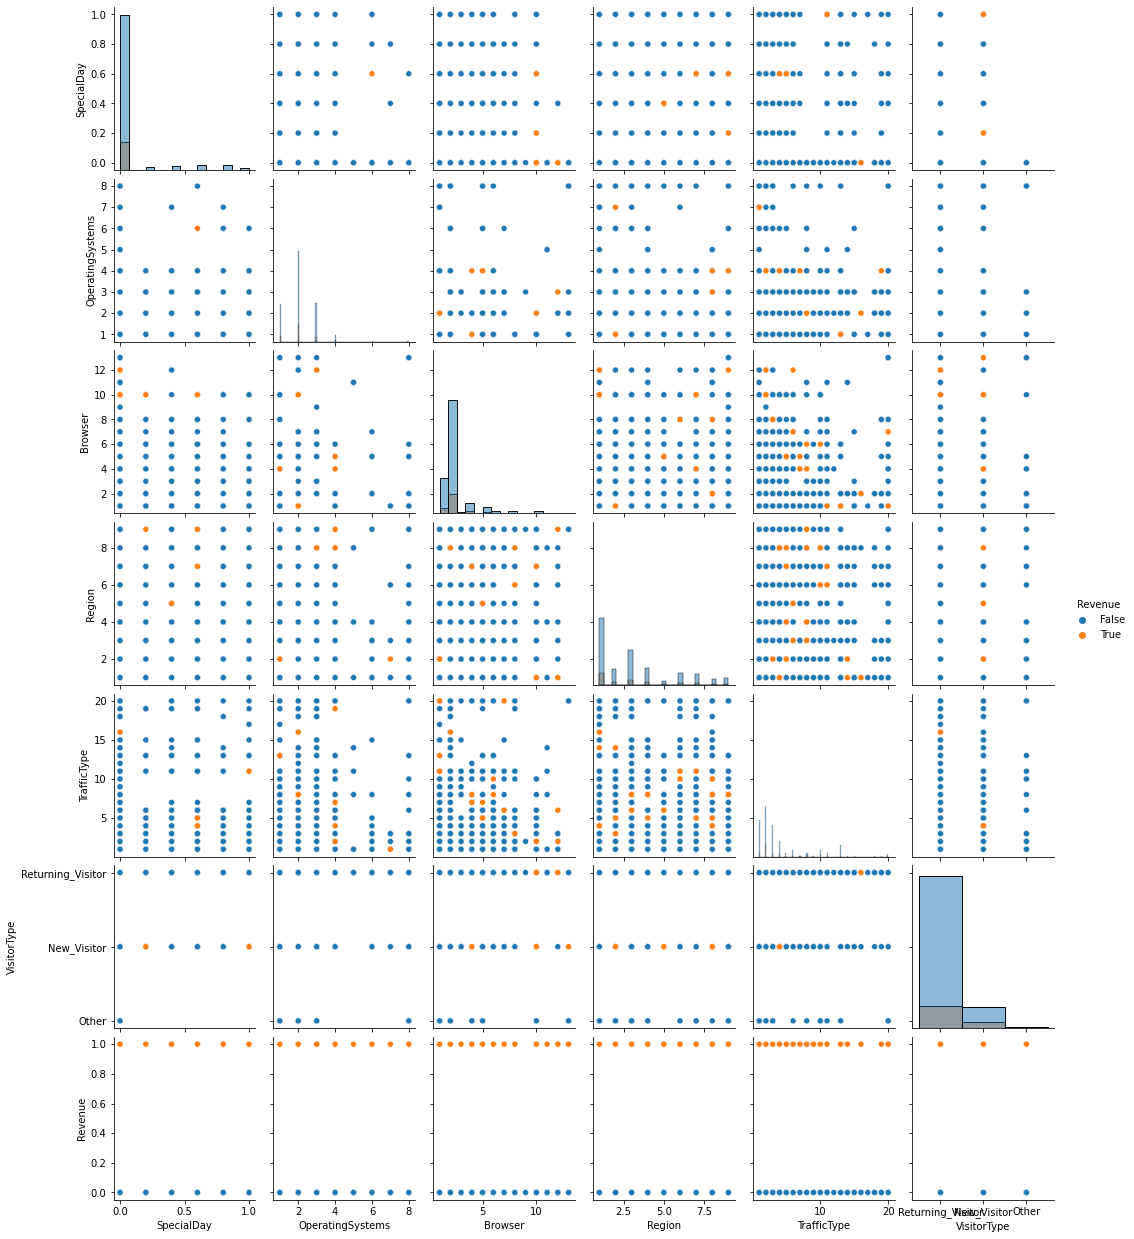

In [11]:
sns.pairplot(df_data[numeric_columns[9:] + ['VisitorType', "Revenue"]],                           
             x_vars= numeric_columns[9:] + ['VisitorType'],
             y_vars= numeric_columns[9:] + ['VisitorType', "Revenue"],
             diag_kind = "hist",             
             hue="Revenue")

###### Conclusion
Although these categorical features do not have any obvious separation in Revenue, it is worth to examing further their possible indication of a purchase.

#Prepare data for analysis

In [12]:
#Map the months from strings to integers, with 1 corresponding to January, etc.
month_mapping = {'Jan':1,
                 'Feb':2,
                 'Mar':3,
                 'Apr':4,
                 'May':5,
                 'June':6,
                 'Jul':7,
                 'Aug':8,
                 'Sep':9,
                 'Oct':10,
                 'Nov':11,
                 'Dec':12}
# Map the months
df_data['Month'] = df_data['Month'].map(month_mapping)

In [13]:
#One-hot encode the categorical features
categorical_columns = ['SpecialDay', 'OperatingSystems', 'Browser', 
                       'Region', 'TrafficType', 'VisitorType',
                      'Weekend']
for column in categorical_columns:
      df_data[column] = df_data[column].apply(str)

df_dummies = pd.get_dummies(df_data[categorical_columns], drop_first=True)

df_data = df_data.drop(categorical_columns, axis=1)
df_data = pd.concat([df_data, df_dummies], axis=1)
df_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'ExitRates',
       'PageValues', 'Month', 'Revenue', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_2',
       'TrafficType_20', 'TrafficType_3', 'Traffic

In [14]:
#Split data on train and test (Train data entries corresponding to the months of June-Dec, and test data entries corresponding to Feb-March.)
df_train = df_data[df_data['Month'] >= 6]
df_test = df_data[(df_data['Month'] >= 2) & (df_data['Month'] <= 3)]
len(df_train), len(df_test)

(6523, 2035)

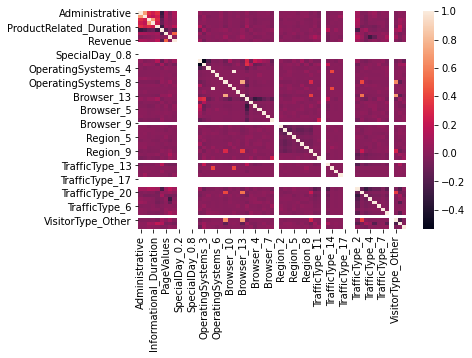

In [15]:
# Compute the Pearson Correlation of each feature and vizualise it
cor = df_train.corr()
sns.heatmap(cor)
plt.show()

Some features are highly correlated.
# Feature Selection on p-value (statistical significance to Y value)

In [16]:
y = df_train['Revenue'].values
columns = list(df_train.columns)
df_out = df_train[columns].copy()
del df_out['Revenue']
del df_out['Month']


def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.01
data_modeled, pv_selected_columns = backwardElimination(df_out.values, y, SL, columns)

/Users/tatiana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/tatiana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [17]:
print('The following columns remain based on p-value selection:')
print(pv_selected_columns)
print("\nNumber of columns selected:", len(pv_selected_columns))
print("Excluded", df_train.shape[1] - 1 - len(pv_selected_columns)," of columns")

The following columns remain based on p-value selection:
['ProductRelated_Duration' 'PageValues' 'Browser_12' 'Browser_2'
 'Region_8' 'Region_9' 'TrafficType_14' 'TrafficType_18' 'TrafficType_19'
 'TrafficType_3' 'TrafficType_6' 'TrafficType_7'
 'VisitorType_Returning_Visitor' 'Weekend_True']

Number of columns selected: 14
Excluded 48  of columns


# Prepare data for future analysis

In [18]:
X_train = df_train[pv_selected_columns].values
y_train = df_train['Revenue'].values

X_test = df_test[pv_selected_columns].values
y_test = df_test['Revenue'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6523, 14) (6523,)
(2035, 14) (2035,)


## Transfer data frame between Jupiter notebooks
Next step "Text preprocessing" is coded in separate Jupiter notebook. So that
- it is easier to locate program for a particular task
- Jupiter notebook is not very long and easier to read

In [19]:
with open('transfer_files/X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f, pickle.HIGHEST_PROTOCOL)

with open('transfer_files/y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f, pickle.HIGHEST_PROTOCOL)

with open('transfer_files/X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f, pickle.HIGHEST_PROTOCOL)

with open('transfer_files/y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f, pickle.HIGHEST_PROTOCOL)